# **Regressão**

Supervisionada -> Regressão -> Previsão ou predição de um valor numérico.

Utiliza os dados de entrada para treinar um algoritmo de Machine Learning e, assim, prever uma resposta numérica.

Dados de Entrada -> Algoritmo Aprendizagem Supervisionada -> Previsão.


**Algoritmos de Regressão**

* Regressão Linear Simples
* Regressão Linear Múltipla
* Árvore de decisão
* Random Forest
* Regressão com Vetores de Suporte
* XGBoost
* LightGBM
* CatBoost
* Redes Neurais Artificiais

# **APRENDIZAGEM SUPERVISIONADA: REGRESSÃO**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever o valor do preço médio de casas em Boston.

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/schirmerchad/bostonhoustingmlnd

In [46]:
import numpy as np
import pandas as pd

In [47]:
df = pd.read_csv('/content/housing.csv',)

In [48]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


**Atributos previsores**

RM: é o número médio de cômodos entre os imóveis no bairro.

LSTAT: é a porcentagem de proprietários no bairro considerados de "classe baixa" (proletariado).

PTRATIO: é a razão entre estudantes e professores nas escolas de ensino fundamental e médio no bairro.

**Variável alvo**

MEDV: valor médio das casas

In [49]:
df.shape

(489, 4)

# **EXPLORAÇÃO E TRATAMENTO DOS DADOS**

Valores Missing (NAN) (Valores Faltantes)

In [50]:
# RELAÇÃO DA QUANTIDADE
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

**Análise dos tipos de atributos.**

In [51]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
df.dtypes

RM         float64
LSTAT      float64
PTRATIO    float64
MEDV       float64
dtype: object

**Dados Estatísticos**

In [52]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


**Análise dos outliers**

In [53]:
import plotly.express as px

In [54]:
boxplot = px.box(df, y="RM")
boxplot.show()

In [55]:
boxplot = px.box(df, y="LSTAT")
boxplot.show()

In [56]:
boxplot = px.box(df, y="PTRATIO")
boxplot.show()

In [57]:
boxplot = px.box(df, y="MEDV")
boxplot.show()

# **CORRELAÇÃO LINEAR**

**Regressão Linear Simples**

Modelo matemático linear capaz de realizar previsões.

**Correlação linear**
Determinado através de gráficos de dispersão e do coeficiente de correlação.

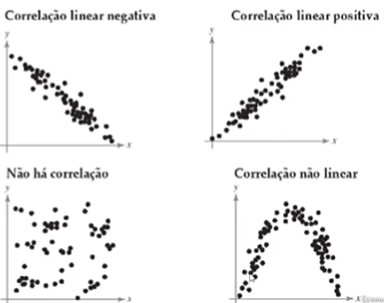

---

**Coeficiente de Correlação Linear (Coeficiente de Pearson)**

* Forma mais precisa de medir a correlação entre duas grandezas.
* Teste Paramético (Normalidade).

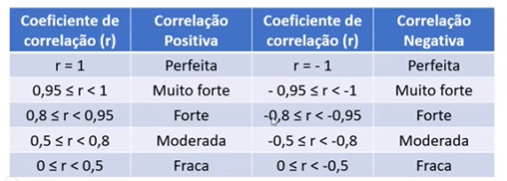

---

**Linhas de regressão**

Linha que melhor se ajusta aos dados plotados, onde a soma dos quadrados dos resíduos seja mínima.


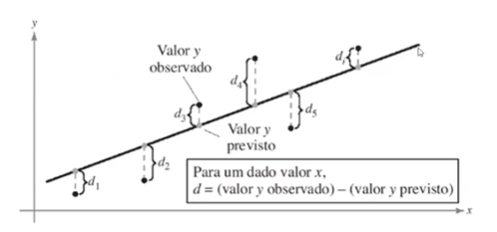

---

**Coeficiente de determinação**

Porcentagem da variação de y que pode ser explicada pela relaçao de x e y.

**Coeficiente de correlação de postos de Spearman**

Teste Não paramétrico

Medida da força da relação entre duas variáveis. Utiliza os postos de entradas de amostras de dados pareados.

Pode ser utilizado na relação de dados lineares e também não lineares, assim como também para dados nível ordinal.

**Coeficiente de correlação de Kendall)**

Teste não paramétrico indicado para número pequeno de amostras.

Ou para populações com grandes quantidades de empates (valores repetidos).

Pode ser utilizado juntamente com o Spearman para comparação.

É mais conservador que o teste de Spearman.









In [58]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


**Atributos previsores**

RM: é o número médio de cômodos entre os imóveis no bairro.

LSTAT: é a porcentagem de proprietários no bairro considerados de "classe baixa" (proletariado).

PTRATIO: é a razão entre estudantes e professores nas escolas de ensino fundamental e médio no bairro.

**Variável alvo**

MEDV: valor médio das casas

In [59]:
import matplotlib.pyplot as plt

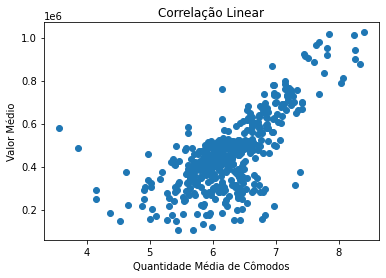

In [60]:
plt.scatter(df.RM, df.MEDV)
plt.title('Correlação Linear')
plt.xlabel('Quantidade Média de Cômodos')
plt.ylabel('Valor Médio')
plt.grid(False)

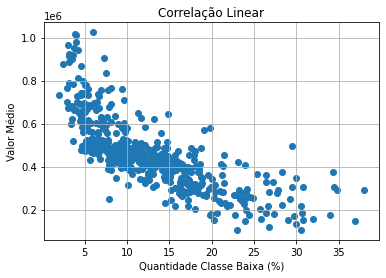

In [61]:
plt.scatter(df.LSTAT, df.MEDV)
plt.title('Correlação Linear')
plt.xlabel('Quantidade Classe Baixa (%)')
plt.ylabel('Valor Médio')
plt.grid(True)


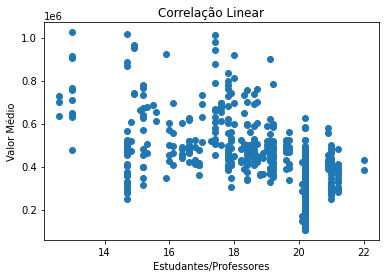

In [62]:
plt.scatter(df.PTRATIO, df.MEDV)
plt.title('Correlação Linear')
plt.xlabel('Estudantes/Professores')
plt.ylabel('Valor Médio')
plt.grid(False)

In [63]:
import seaborn as sns

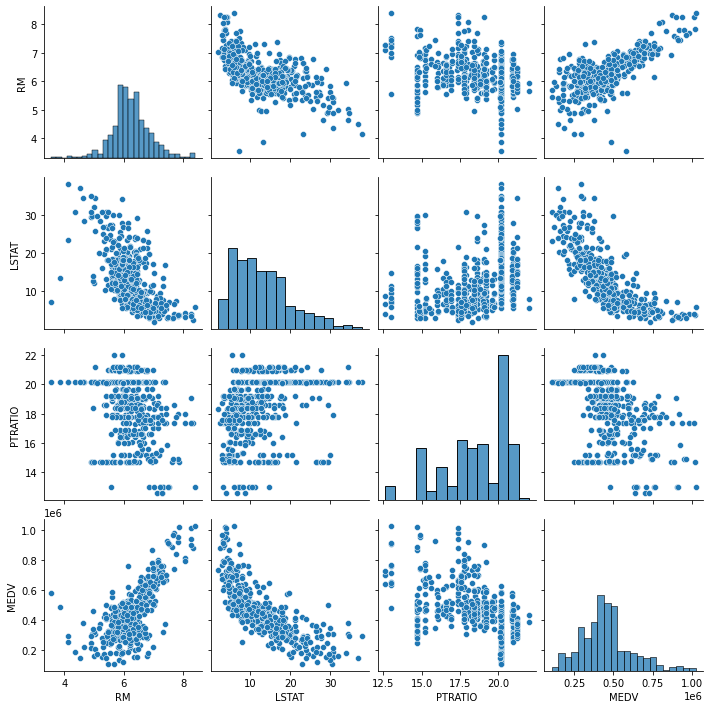

In [64]:
sns.pairplot(df);

## **Análise da Normalidade**

Gráfico QQ-Plot (Analise Gráfica)

In [65]:
import scipy.stats as stats

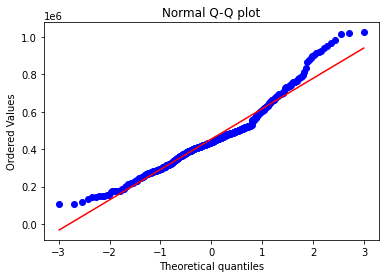

In [66]:
stats.probplot(df['MEDV'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [67]:
import plotly.express as px

In [68]:
hist =  px.histogram (df,  x = "MEDV", nbins=60) 
hist.update_layout(width=800,height=500,title_text='Média dos valores') 
hist.show()

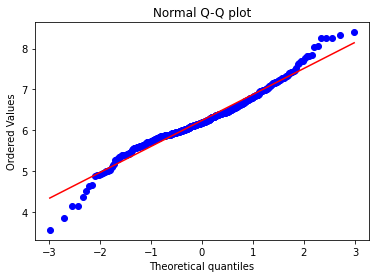

In [69]:
stats.probplot(df['RM'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [70]:
hist =  px.histogram (df,  x = "RM", nbins=40) 
hist.update_layout(width=800,height=500,title_text='Quantidade de cômodos') 
hist.show()

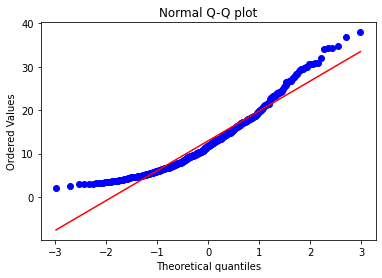

In [71]:
stats.probplot(df['LSTAT'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [72]:
hist =  px.histogram (df,  x = "LSTAT", nbins=60) 
hist.update_layout(width=800,height=500,title_text='Quantidade de Classe Baixa (%)') 
hist.show()

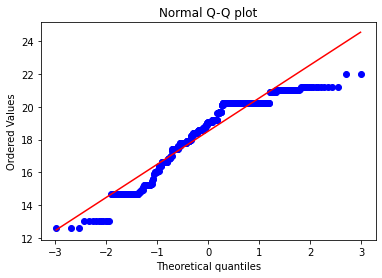

In [73]:
stats.probplot(df['PTRATIO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [74]:
hist =  px.histogram (df,  x = "PTRATIO", nbins=60) 
hist.update_layout(width=800,height=500,title_text='Relação Estudantes/Professores') 
hist.show()

Podemos ver que não tem correlação normal e distribuição não é normal.

**Teste Shapiro-Wilk**

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [75]:
stats.shapiro(df.MEDV)

ShapiroResult(statistic=0.9596613645553589, pvalue=2.5757390664793434e-10)

In [76]:
estatistica, p = stats.shapiro(df.MEDV)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9596613645553589
p-valor: 2.5757390664793434e-10


In [77]:
estatistica, p = stats.shapiro(df.RM)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.970818281173706
p-valor: 2.7105865996190914e-08


In [78]:
estatistica, p = stats.shapiro(df.LSTAT)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9371760487556458
p-valor: 1.6900520425407878e-13


In [79]:
estatistica, p = stats.shapiro(df.PTRATIO)
print('Estatística do teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística do teste: 0.9064712524414062
p-valor: 9.058795024736088e-17


**Teste Lilliefors (Kolmogorov_Sminorv)**

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [80]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [81]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.MEDV, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.11370576407672117
p-valor: 0.0009999999999998899


In [82]:
estatistica, p = statsmodels.stats.diagnostic.lilliefors(df.RM, dist = 'norm')
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.06394344399233598
p-valor: 0.0009999999999998899


## **Correlação Linear**

Pearson (distribuição normal)

Spearman (distribuição não normal)

Kendall (distribuição não normal com quantidade pequena de amostras)

Ho = não há corrrelação linear: p > 0,05

Ha = existe correlação linear: p <= 0,05

In [83]:
# Pearson
#coef,p = stats.pearsonr(df.MEDV, df.RM)
#print('Coeficiente de correlação: {}'.format(coef))
#print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.6972092210185156
p-valor: 2.053314114951594e-72


In [84]:
# Spearman
coef,p = stats.spearmanr(df.MEDV, df.PTRATIO)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: -0.5592761164167336
p-valor: 1.3794858687631326e-41


In [85]:
# Kendall
#coef,p = stats.kendalltau(df.MEDV,df.RM)
#print('Coeficiente de correlação: {}'.format(coef))
#print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.4724931551110662
p-valor: 9.983146011545853e-55


In [89]:
correlacoes = df.corr(method='spearman')
correlacoes

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.624700,-0.282053,0.624057
LSTAT,-0.624700,1.000000,0.461739,-0.845527
PTRATIO,-0.282053,0.461739,1.000000,-0.559276
MEDV,0.624057,-0.845527,-0.559276,1.000000


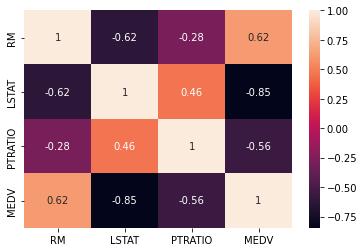

In [87]:
plt.figure()
sns.heatmap(correlacoes, annot=True);